# Pretrained Model

- 다른 목적을 위해 미리 학습된 모델.
- Pretrained model을 현재 해결하려는 문제에 이용한다.
- 대부분 내가 만들려는 네트워크 모델에 pretrained model을 포함시켜 사용한다.
    - 이런 방식을 Transfer Learning (전이 학습)이라고 한다.
    - 보통 Feature Extractor block을 재사용한다.

## Pytorch에서 제공하는 Pretrained Model 
- 분야별 라이브러리에서 제공
    - torchvision: https://pytorch.org/vision/stable/models.html
- torch hub 를 이용해 모델과 학습된 parameter를 사용할 수 있다.
    - https://pytorch.org/hub/
- 이외에도 많은 모델과 학습된 paramter가 인터넷상에 공개되 있다.    
    - 딥러닝 모델기반 application을 개발 할 때는 대부분 Transfer Learning을 한다.  
    - 다양한 분야에서 연구된 많은 딥러닝 모델들이 구현되어 공개 되어 있으며 학습된 Parameter들도 제공되고 있다.  
    - [paperswithcode](https://paperswithcode.com/)에서 State Of The Art(SOTA) 논문들과 그 구현된 모델을 확인할 수 있다. 
    
>  **State Of The Art(SOTA)**: 특정 시점에 특정 분야에서 가장 성능이 좋은 모델을 말한다.

## VGGNet Pretrained 모델을 이용해 이미지 분류

- Output으로 1000개의 class에 대한 확률을 출력한다.



In [3]:
# 1000개의 class 목록
!pip install wget
import wget
url = 'https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt'
imagenet_filepath = wget.download(url)

In [4]:
download_path = r'./data/'
download_imagenet_path = download_path + imagenet_filepath
download_imagenet_path

'./data/imagenet1000_clsidx_to_labels.txt'

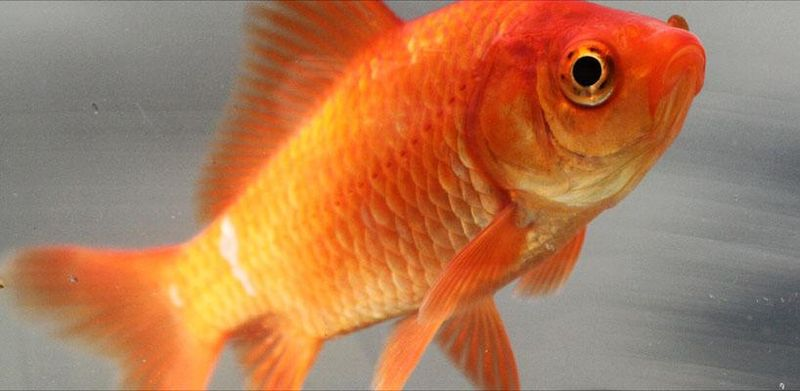

In [5]:
# 추론할 이미지 다운로드
import requests
from io import BytesIO
from PIL import Image

img_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/Common_goldfish.JPG/800px-Common_goldfish.JPG'
# img_url = 'https://cdn.download.ams.birds.cornell.edu/api/v1/asset/169231441/1800'
# img_url = 'https://blogs.ifas.ufl.edu/news/files/2021/10/anole-FB.jpg'
res = requests.get(img_url)
test_img = Image.open(BytesIO(res.content))
test_img

In [6]:
import torch
from torchvision import transforms, models
from torchinfo import summary

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
CPU = 'cpu'
DEVICE, CPU

('cuda', 'cpu')

In [7]:
load_model = models.vgg19(weights=models.VGG19_Weights.DEFAULT)
load_model_2  = models.alexnet(weights=models.AlexNet_Weights.DEFAULT)

In [8]:
summary(load_model, input_size=(1, 3, 224, 224), device=DEVICE)

/home/parking/anaconda3/envs/ml/lib/python3.10/site-packages/torch/nn/modules/conv.py:459: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [1, 1000]                 --
├─Sequential: 1-1                        [1, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         1,792
│    └─ReLU: 2-2                         [1, 64, 224, 224]         --
│    └─Conv2d: 2-3                       [1, 64, 224, 224]         36,928
│    └─ReLU: 2-4                         [1, 64, 224, 224]         --
│    └─MaxPool2d: 2-5                    [1, 64, 112, 112]         --
│    └─Conv2d: 2-6                       [1, 128, 112, 112]        73,856
│    └─ReLU: 2-7                         [1, 128, 112, 112]        --
│    └─Conv2d: 2-8                       [1, 128, 112, 112]        147,584
│    └─ReLU: 2-9                         [1, 128, 112, 112]        --
│    └─MaxPool2d: 2-10                   [1, 128, 56, 56]          --
│    └─Conv2d: 2-11                      [1, 256, 56, 56]          29

In [9]:
summary(load_model_2, input_size=(1, 3, 224, 224), device=DEVICE)

Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  [1, 1000]                 --
├─Sequential: 1-1                        [1, 256, 6, 6]            --
│    └─Conv2d: 2-1                       [1, 64, 55, 55]           23,296
│    └─ReLU: 2-2                         [1, 64, 55, 55]           --
│    └─MaxPool2d: 2-3                    [1, 64, 27, 27]           --
│    └─Conv2d: 2-4                       [1, 192, 27, 27]          307,392
│    └─ReLU: 2-5                         [1, 192, 27, 27]          --
│    └─MaxPool2d: 2-6                    [1, 192, 13, 13]          --
│    └─Conv2d: 2-7                       [1, 384, 13, 13]          663,936
│    └─ReLU: 2-8                         [1, 384, 13, 13]          --
│    └─Conv2d: 2-9                       [1, 256, 13, 13]          884,992
│    └─ReLU: 2-10                        [1, 256, 13, 13]          --
│    └─Conv2d: 2-11                      [1, 256, 13, 13]         

In [10]:
load_model = load_model.to(DEVICE)
input_data = torch.randn(1, 3, 224, 224).to(DEVICE)
pred_temp = load_model(input_data)

In [11]:
torch.nn.Softmax(dim=1)(pred_temp).sum()

tensor(1.0000, device='cuda:0', grad_fn=<SumBackward0>)

In [12]:
pred_label = torch.argmax(pred_temp, dim=1)
pred_label

tensor([904], device='cuda:0')

In [13]:
with open(download_imagenet_path) as f:
    idx_to_class = eval(f.read())

print(idx_to_class[pred_label.item()])

window screen


In [91]:
# 추론할 이미지 다운로드
import requests
from io import BytesIO
from PIL import Image

urls = [
    'https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/Common_goldfish.JPG/800px-Common_goldfish.JPG',
    'https://cdn.download.ams.birds.cornell.edu/api/v1/asset/169231441/1800',
    'https://blogs.ifas.ufl.edu/news/files/2021/10/anole-FB.jpg',
    'https://www.ellevetsciences.com/wp-content/uploads/2022/08/ev-blog-mainecoon-header-1024x683.jpg',
    'https://i0.wp.com/thediscerningcat.com/wp-content/uploads/2022/11/orange-maine-coon-cat.jpg',
    'https://images.mypetlife.co.kr/content/uploads/2021/05/26132237/lina-angelov-1vNvGY11Lds-unsplash-1024x683.jpg',
    'https://static1.squarespace.com/static/54e7a1a6e4b08db9da801ded/t/61eb41b698b5f077a9637a40/1642807755677/81.jpg',
]

test_imgs = []

for url in urls:
    res = requests.get(url)
    test_imgs.append(Image.open(BytesIO(res.content)))

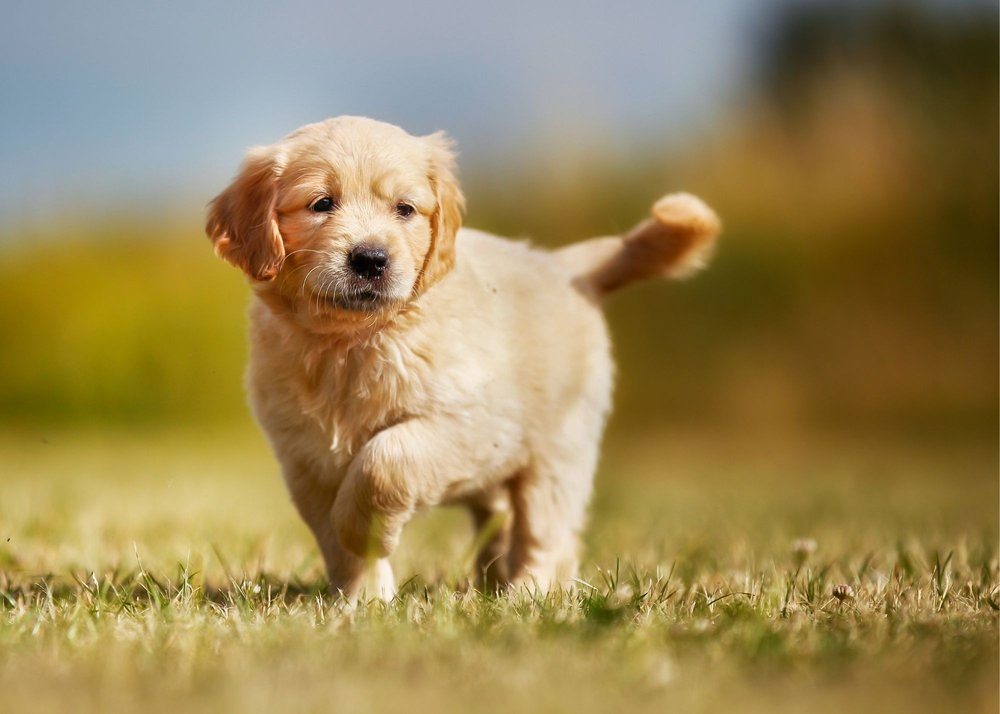

In [92]:
test_imgs[-1]

In [93]:
# 이미지 전처리
preprocess = transforms.Compose([
    transforms.Resize((244, 244)),
    # transforms.CenterCrop(224),
    transforms.ToTensor(),
    # transforms.Normalize(
    #     mean=[0.485, 0.456, 0.406],
    #     std=[0.229, 0.224, 0.225]
    #     )
    ])

input_datas = torch.Tensor()

for img in test_imgs:
    input_data = preprocess(img)
    input_data = input_data.unsqueeze(0)
    input_datas = torch.cat([input_datas, input_data], dim=0)

input_datas.shape

torch.Size([7, 3, 244, 244])

In [94]:
# 추론
load_model.to(DEVICE)
load_model.eval()
preds = load_model(input_datas.to(DEVICE))
#클래스 추출
pred_labels = torch.argmax(preds, dim=1)
# 클래스 확률 추출
pred_proba_tmps = torch.nn.Softmax(dim=1)(preds)
pred_probas = torch.max(pred_proba_tmps, dim=1).values
pred_labels, pred_probas

(tensor([  1, 100,  47, 287, 287, 283, 207], device='cuda:0'),
 tensor([0.8611, 0.9427, 0.3181, 0.5628, 0.3771, 0.7662, 0.4651],
        device='cuda:0', grad_fn=<MaxBackward0>))

In [95]:
for i, pred_label in enumerate(pred_labels):
    print(f'{i+1}번째 이미지의 예측 결과 : {idx_to_class[pred_label.item()]}', end=' ')
    print(f' 확률 : {pred_probas[i].item():.4f}')

1번째 이미지의 예측 결과 : goldfish, Carassius auratus  확률 : 0.8611
2번째 이미지의 예측 결과 : black swan, Cygnus atratus  확률 : 0.9427
3번째 이미지의 예측 결과 : African chameleon, Chamaeleo chamaeleon  확률 : 0.3181
4번째 이미지의 예측 결과 : lynx, catamount  확률 : 0.5628
5번째 이미지의 예측 결과 : lynx, catamount  확률 : 0.3771
6번째 이미지의 예측 결과 : Persian cat  확률 : 0.7662
7번째 이미지의 예측 결과 : golden retriever  확률 : 0.4651


# Transfer learning (전이학습)
- 사전에 학습된 신경망의 구조와 파라미터를 재사용해서 새로운 모델(우리가 만드는 모델)의 시작점으로 삼고 해결하려는 문제를 위해 다시 학습시킨다.
- 전이 학습을 통해 다음을 해결할 수 있다.
    1. 데이터 부족문제
        - 딥러닝은 대용량의 학습데이터가 필요하다.
        - 충분한 데이터를 수집하는 것은 항상 어렵다.
    2. 과다한 계산량
        - 신경망 학습에는 엄청난 양의 계산 자원이 필요하다.

![transfer_learning01](figures/09_transfer_01.png)

- 미리 학습된(pre-trained) Model을 이용하여 모델을 구성한 뒤 현재 하려는 예측 문제를 해결한다.
- 보통 Pretrained Model에서 Feature Extraction 부분을 사용한다.
    - Computer Vision 문제의 경우 Bottom 쪽의 Convolution Layer(Feature Extractor)들은 이미지에 나타나는 일반적인 특성을 추출하므로 **다른 대상을 가지고 학습했다고 하더라도 재사용할 수 있다.**
    - Top 부분 Layer 부분은 특히 출력 Layer의 경우 대상 데이터셋의 목적에 맞게 변경 해야 하므로 재사용할 수 없다.

![transfer_learning02](figures/09_transfer_02.png)

> **Frozon**: Training시 parameter가 update 되지 않도록 하는 것을 말한다.

### Feature extraction 재사용
- Pretrained Model에서 Feature Extractor 만 가져오고 추론기(Fully connected layer)만 새로 정의한 뒤 그 둘을 합쳐서 모델을 만든다.
- 학습시 직접 구성한 추론기만 학습되도록 한다.
    - Feature Extractor는 추론을 위한 Feature 추출을 하는 역할만 하고 그 parameter(weight)가 학습되지 않도록 한다.
- 모델/레이어의 parameter trainable 여부 속성 변경
    - model/layer 의 `parameters()` 메소드를 이용해 weight와 bias를 조회한 뒤 `requires_grad` 속성을 `False`로 변경한다.
        
#### Backbone, Base network
전체 네트워크에서 Feature Extraction의 역할을 담당하는 부분을 backbone/base network라고 한다.

## Fine-tuning(미세조정)
- Transfer Learning을 위한 Pretrained 모델을 내가 학습시켜야 하는 데이터셋(Custom Dataset)으로 **재학습**시키는 것을 fine tunning 이라고 한다.
- 주어진 문제에 더 적합하도록 Feature Extractor의 가중치들도 조정 한다.

### Fine tuning 전략
![transfer02](figures/09_transfer_03.png)

- **세 전략 모두 추론기는 trainable로 한다.**

**<font size='5'>1. 전체 모델을 전부 학습시킨다.(1번)</font>**    
- Pretrained 모델의 weight는 Feature extraction 의 초기 weight 역할을 한다.
- **Train dataset의 양이 많고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **낮은 경우** 적용.
- 학습에 시간이 많이 걸린다.
    
    
**<font size='5'>2. Pretrained 모델 Bottom layer들(Input과 가까운 Layer들)은 고정시키고 Top layer의 일부를 재학습시킨다.(2번)</font>**     
- **Train dataset의 양이 많고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **높은 경우** 적용.
- **Train dataset의 양이 적고** Pretained 모델이 학습했던 dataset과 custom dataset의 class간의 유사성이 **낮은 경우** 적용
    
    
**<font size='5'>3. Pretrained 모델 전체를 고정시키고 classifier layer들만 학습시킨다.(3번)</font>**      
- **Train dataset의 양이 적고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **높은 경우** 적용.
  
  
> **Custom dataset:** 내가 학습시키고자 하는 dataset 
> 1번 2번 전략을 Fine tuning 이라고 한다.

![fine tuning](figures/09_finetuning.png)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from torchinfo import summary

from module.train import fit
from module.utils import plot_fit_result

import os
from zipfile import ZipFile
!pip install gdown -U
import gdown

DEVICE = 'cuda' if torch.cuda.is_available() else "cpu"
CPU = 'cpu'
DEVICE, CPU

('cuda', 'cpu')

In [2]:
# download
url = 'https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV'
path = r'./dataset_comp/'
file_name = r'cats_and_dogs_small.zip'
file_path = path + file_name
gdown.download(url, file_path, quiet=False)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV
From (redirected): https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV&confirm=t&uuid=4be8ae38-72c2-4394-b4d6-d1218c962400
To: /home/parking/ml/ml_colab_project/DL_learning/dataset_comp/cats_and_dogs_small.zip
100%|██████████| 90.8M/90.8M [00:02<00:00, 45.2MB/s]


'./dataset_comp/cats_and_dogs_small.zip'

In [3]:
# unzip
uncompress_path = r'./datasets/cat_and_dog/'
with ZipFile(file_path) as zipf:
    zipf.extractall(uncompress_path)

### Dataset, DataLoader 생성

In [4]:
# transform -> Resize + Image augmentaion + ToTensor
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ColorJitter(brightness=0.5,
                            contrast=0.3,   # 1.3~0.7 사이의 값으로 설정
                            saturation=0.15,
                            ),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(90),          # -90~90 사이의 값으로 설정
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.485, 0.456, 0.406),         # ImageNet 데이터셋의 mean
        std=(0.229, 0.224, 0.225)           # ImageNet 데이터셋의 std
        ),
])
# test셋은 augmentation을 하지 않음
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.485, 0.456, 0.406),         # ImageNet 데이터셋의 mean
        std=(0.229, 0.224, 0.225)           # ImageNet 데이터셋의 std
        ),
    ])

In [5]:
# dataset
train_dataset = datasets.ImageFolder(root=uncompress_path+'train',
                                    transform=train_transform)

valid_dataset = datasets.ImageFolder(root=uncompress_path+'validation',
                                    transform=test_transform)

test_dataset = datasets.ImageFolder(root=uncompress_path+'test',
                                    transform=test_transform)

In [6]:
train_dataset.classes, train_dataset.class_to_idx

(['cats', 'dogs'], {'cats': 0, 'dogs': 1})

In [7]:
os.cpu_count()

16

In [8]:
BATCH_SIZE = 256
LR = 0.001
N_EPOCHS = 20

# dataloader
train_loader = torch.utils.data.DataLoader(train_dataset,
                                            batch_size=BATCH_SIZE,
                                            shuffle=True,
                                            drop_last=True,
                                            num_workers=os.cpu_count(), # os.cpu_count() : cpu 코어 개수
                                            )

valid_loader = torch.utils.data.DataLoader(valid_dataset,
                                            batch_size=BATCH_SIZE,
                                            num_workers=os.cpu_count(),
                                            )

test_loader = torch.utils.data.DataLoader(test_dataset,
                                            batch_size=BATCH_SIZE,
                                            num_workers=os.cpu_count(),
                                            )

In [9]:
len(train_loader), len(valid_loader), len(test_loader)

(7, 4, 4)

In [69]:
#VGG19
model = models.vgg19(weights=models.VGG19_Weights.DEFAULT)
summary(model, input_size=(1, 3, 224, 224), device=DEVICE)

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [1, 1000]                 --
├─Sequential: 1-1                        [1, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         1,792
│    └─ReLU: 2-2                         [1, 64, 224, 224]         --
│    └─Conv2d: 2-3                       [1, 64, 224, 224]         36,928
│    └─ReLU: 2-4                         [1, 64, 224, 224]         --
│    └─MaxPool2d: 2-5                    [1, 64, 112, 112]         --
│    └─Conv2d: 2-6                       [1, 128, 112, 112]        73,856
│    └─ReLU: 2-7                         [1, 128, 112, 112]        --
│    └─Conv2d: 2-8                       [1, 128, 112, 112]        147,584
│    └─ReLU: 2-9                         [1, 128, 112, 112]        --
│    └─MaxPool2d: 2-10                   [1, 128, 56, 56]          --
│    └─Conv2d: 2-11                      [1, 256, 56, 56]          29

In [70]:
# 모델의 파라미터들 조회 (weight, bias)
# model.layer.weight, model.layer.bias
# model.parameters() : generator
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [71]:
model.features[0].weight.shape, model.features[0].weight.requires_grad
model.features[0].bias.shape, model.features[0].bias.requires_grad

(torch.Size([64]), True)

In [72]:
# 각 레이어별 파라미터들을 주는 generator를 반환
# model.parameters()
count = 0
for param in model.parameters():
    print(param.shape, param.requires_grad)
    count += 1
    # 각 레이어의 weight
    # 각 레이어의 bias 
    # 순서대로 출력
    # requires_grad : 학습 여부
count

torch.Size([64, 3, 3, 3]) True
torch.Size([64]) True
torch.Size([64, 64, 3, 3]) True
torch.Size([64]) True
torch.Size([128, 64, 3, 3]) True
torch.Size([128]) True
torch.Size([128, 128, 3, 3]) True
torch.Size([128]) True
torch.Size([256, 128, 3, 3]) True
torch.Size([256]) True
torch.Size([256, 256, 3, 3]) True
torch.Size([256]) True
torch.Size([256, 256, 3, 3]) True
torch.Size([256]) True
torch.Size([256, 256, 3, 3]) True
torch.Size([256]) True
torch.Size([512, 256, 3, 3]) True
torch.Size([512]) True
torch.Size([512, 512, 3, 3]) True
torch.Size([512]) True
torch.Size([512, 512, 3, 3]) True
torch.Size([512]) True
torch.Size([512, 512, 3, 3]) True
torch.Size([512]) True
torch.Size([512, 512, 3, 3]) True
torch.Size([512]) True
torch.Size([512, 512, 3, 3]) True
torch.Size([512]) True
torch.Size([512, 512, 3, 3]) True
torch.Size([512]) True
torch.Size([512, 512, 3, 3]) True
torch.Size([512]) True
torch.Size([4096, 25088]) True
torch.Size([4096]) True
torch.Size([4096, 4096]) True
torch.Size(

38

In [73]:
# 레이어들의 파라미터들을 Frozen 시키기 (역전파 시에 업데이트 되지 않음)
# requires_grad = False
for param in model.parameters():
    param.requires_grad = False


In [74]:
# 마지막 레이어를 변경
# 개/고양이 분류를 위한 레이어로 변경
model.classifier = nn.Sequential(
    nn.Linear(25088, 4096),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4096, 4096),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4096, 1), # binary classification
    nn.Sigmoid()
)

In [75]:
summary(model, input_size=(1, 3, 224, 224), device=DEVICE)

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [1, 1]                    --
├─Sequential: 1-1                        [1, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         (1,792)
│    └─ReLU: 2-2                         [1, 64, 224, 224]         --
│    └─Conv2d: 2-3                       [1, 64, 224, 224]         (36,928)
│    └─ReLU: 2-4                         [1, 64, 224, 224]         --
│    └─MaxPool2d: 2-5                    [1, 64, 112, 112]         --
│    └─Conv2d: 2-6                       [1, 128, 112, 112]        (73,856)
│    └─ReLU: 2-7                         [1, 128, 112, 112]        --
│    └─Conv2d: 2-8                       [1, 128, 112, 112]        (147,584)
│    └─ReLU: 2-9                         [1, 128, 112, 112]        --
│    └─MaxPool2d: 2-10                   [1, 128, 56, 56]          --
│    └─Conv2d: 2-11                      [1, 256, 56, 56]    

In [76]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [82]:
# gpu 메모리 초기화 모듈
!pip install numba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 42.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 36.4 MB/s eta 0:00:0000:0100:01


In [13]:
# gpu 메모리 초기화
from numba import cuda

device = cuda.get_current_device()
device.reset()

### (GPU 메모리 초기화)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from torchinfo import summary

from module.train import fit
from module.utils import plot_fit_result

import os

DEVICE = 'cuda' if torch.cuda.is_available() else "cpu"
CPU = 'cpu'

uncompress_path = r'./datasets/cat_and_dog/'

# transform -> Resize + Image augmentaion + ToTensor
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ColorJitter(brightness=0.5,
                            contrast=0.3,   # 1.3~0.7 사이의 값으로 설정
                            saturation=0.15,
                            ),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(90),          # -90~90 사이의 값으로 설정
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.485, 0.456, 0.406),         # ImageNet 데이터셋의 mean
        std=(0.229, 0.224, 0.225)           # ImageNet 데이터셋의 std
        ),
])
# test셋은 augmentation을 하지 않음
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.485, 0.456, 0.406),         # ImageNet 데이터셋의 mean
        std=(0.229, 0.224, 0.225)           # ImageNet 데이터셋의 std
        ),
    ])

# dataset
train_dataset = datasets.ImageFolder(root=uncompress_path+'train',
                                    transform=train_transform)

valid_dataset = datasets.ImageFolder(root=uncompress_path+'validation',
                                    transform=test_transform)

test_dataset = datasets.ImageFolder(root=uncompress_path+'test',
                                    transform=test_transform)

BATCH_SIZE = 256
LR = 0.001
N_EPOCHS = 20

# dataloader
train_loader = torch.utils.data.DataLoader(train_dataset,
                                            batch_size=BATCH_SIZE,
                                            shuffle=True,
                                            drop_last=True,
                                            num_workers=os.cpu_count(), # os.cpu_count() : cpu 코어 개수
                                            )

valid_loader = torch.utils.data.DataLoader(valid_dataset,
                                            batch_size=BATCH_SIZE,
                                            num_workers=os.cpu_count(),
                                            )

test_loader = torch.utils.data.DataLoader(test_dataset,
                                            batch_size=BATCH_SIZE,
                                            num_workers=os.cpu_count(),
                                            )

In [2]:
# VGG19 모델 불러오기
model = models.vgg19(weights=models.VGG19_Weights.DEFAULT)
# 모델 parameter들을 학습하지 않도록 설정
for param in model.parameters():
    param.requires_grad = False
# classifier 레이어를 변경
model.classifier = nn.Sequential(
    nn.Linear(25088, 4096),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4096, 4096),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4096, 2),
)

In [3]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
CPU = 'cpu'
DEVICE, CPU

('cuda', 'cpu')

In [4]:
# loss function
criterion = nn.CrossEntropyLoss()
# optimizer
optimizer = optim.Adam(model.parameters(), lr=LR)

# path
save_path = r'./models/cat_and_dog/'
model_name = 'vgg19_base.pt'
os.makedirs(save_path, exist_ok=True)
save_model_path = save_path + model_name

model = model.to(DEVICE)

N_EPOCHS = 20

In [5]:
# train
result = fit(model=model, train_loader=train_loader, val_loader=valid_loader,
    loss_fn=criterion, optimizer=optimizer, epochs=N_EPOCHS,
    save_best_model=True, save_model_path=save_model_path,
    early_stopping=False, patience=10,
    device=DEVICE, mode='multi',
    )

/home/parking/anaconda3/envs/ml/lib/python3.10/site-packages/torch/nn/modules/conv.py:459: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch[1/20] - Train loss: 0.51937 Train Accucracy: 0.62050 || Validation Loss: 0.16059 Validation Accuracy: 0.97000
저장: 1 - 이전 : inf, 현재: 0.16058778762817383
Epoch[2/20] - Train loss: 0.24104 Train Accucracy: 0.80550 || Validation Loss: 0.07183 Validation Accuracy: 0.97700
저장: 2 - 이전 : 0.16058778762817383, 현재: 0.07182990526780486
Epoch[3/20] - Train loss: 0.26015 Train Accucracy: 0.78900 || Validation Loss: 0.05167 Validation Accuracy: 0.97800
저장: 3 - 이전 : 0.07182990526780486, 현재: 0.05167244654148817
Epoch[4/20] - Train loss: 0.23655 Train Accucracy: 0.80100 || Validation Loss: 0.05343 Validation Accuracy: 0.98000
Epoch[5/20] - Train loss: 0.17242 Train Accucracy: 0.83000 || Validation Loss: 0.06167 Validation Accuracy: 0.98000
Epoch[6/20] - Train loss: 0.19601 Train Accucracy: 0.83100 || Validation Loss: 0.06439 Validation Accuracy: 0.97700
Epoch[7/20] - Train loss: 0.18934 Train Accucracy: 0.82000 || Validation Loss: 0.07083 Validation Accuracy: 0.98300
Epoch[8/20] - Train loss: 0.16

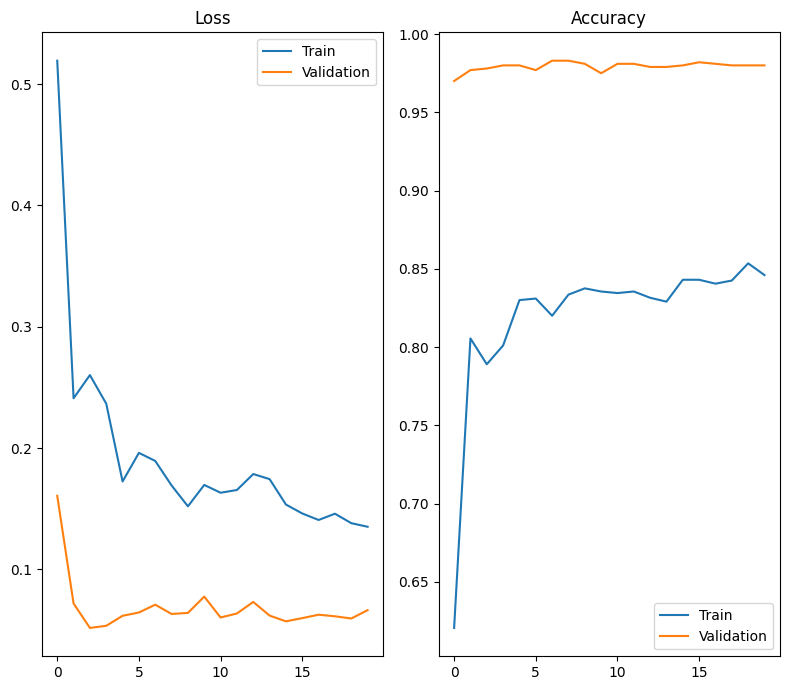

In [6]:
plot_fit_result(*result)

## backbone 모델의 일부는 trainable, 일부는 frozen
- top 쪽 Layer들은 trainable    (output 쪽)
- bottom 쪽 Layer들은 frozen    (input 쪽)



In [ ]:
# VGG19 모델 불러오기
model2 = models.vgg19(weights=models.VGG19_Weights.DEFAULT)
# 일부 레이어의 parameter들을 학습하지 않도록 설정
for idx, param in enumerate(model2.parameters()):
    if idx <= 25:
        param.requires_grad = False
# classifier 레이어를 변경
model2.classifier = nn.Sequential(
    nn.Linear(25088, 4096),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4096, 4096),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4096, 2),
)